# Chapter 9. Unsupervised Learning Techniques

## Clustering

Identifying similar instances and assigning them to clusters

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

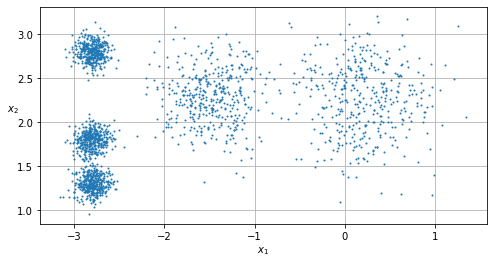

In [2]:
# extra code – this cell generates and saves Figure 9–2
import matplotlib.pyplot as plt
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
#save_fig("blobs_plot")
plt.show()

The KMeans instance preserves the
predicted labels of the instances it was trained on

In [3]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [4]:
y_pred is kmeans.labels_

True

In [5]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [6]:
import numpy as np

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In the KMeans class, the transform() method measures the distance from each instance to every centroid

In [7]:
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

### Centroid initialization method

setting the init hyperparameter to a NumPy array containing the list of centroids, and setting the n_init to 1:

In [8]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

In [9]:
kmeans.inertia_

211.59853725816836

The performance metric of the model after 1 random initialization

In [10]:
kmeans.score(X)

-211.59853725816834

In [11]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

**Using `MiniBatchKMeans` along with `memmap`**

In [12]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

In [13]:
# training memmap
filename = "my_mnist.mmap"
X_memmap = np.memmap(filename, dtype="float32", mode='write',
                    shape=X_train.shape)

X_memmap[:] = X_train
X_memmap.flush()

In [14]:
from sklearn.cluster import MiniBatchKMeans
clusters_per_k = range(2, 20)
for k in clusters_per_k:
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    minibatch_kmeans.fit(X_memmap)

#### Finding the optimal k value

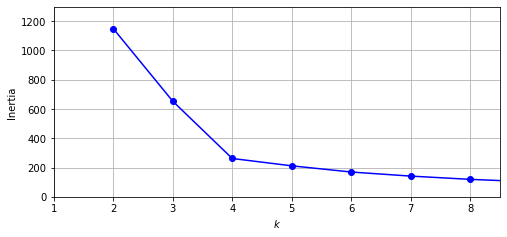

In [15]:
# elbow plot
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(2, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")

plt.axis([1, 8.5, 0, 1300])
plt.grid()
#save_fig("inertia_vs_k_plot")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (8,) and (7,)

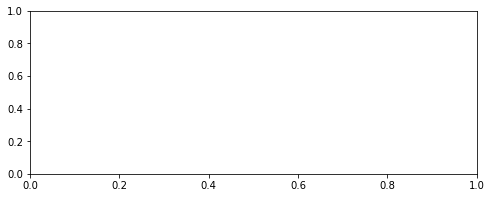

In [16]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
#save_fig("silhouette_score_vs_k_plot")
plt.show()

In [ ]:
K = range(2,10)
distortions= []
for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  distortions.append(kmeans.inertia_)

In [ ]:
distortions